# Titanic Dataset
#### In this project we are going to look at the data collected about the passangers of Titanic and make some vizualizations to interpret the various data points, for influence on survival probabilty.

###### First lets run through the data and look for any missing data.

In [133]:
import pandas as pd
# We have loaded the raw CSV file into a Pandas DataFrame called titanic_data
titanic_data = pd.read_csv('titanic_data.csv', sep=',')
# We can use the sample funtion of pandas.DataFrame to look at a random sample of the data
print titanic_data.sample(n=10)
# Make Sure MathPlotLib plots are shown in-line and look good
%pylab inline
import seaborn as sns

     PassengerId  Survived  Pclass                                   Name  \
766          767         0       1              Brewe, Dr. Arthur Jackson   
221          222         0       2                   Bracken, Mr. James H   
128          129         1       3                      Peter, Miss. Anna   
238          239         0       2        Pengelly, Mr. Frederick William   
866          867         1       2           Duran y More, Miss. Asuncion   
422          423         0       3                     Zimmerman, Mr. Leo   
304          305         0       3      Williams, Mr. Howard Hugh "Harry"   
546          547         1       2      Beane, Mrs. Edward (Ethel Clarke)   
375          376         1       1  Meyer, Mrs. Edgar Joseph (Leila Saks)   
547          548         1       2             Padro y Manent, Mr. Julian   

        Sex   Age  SibSp  Parch         Ticket     Fare  Cabin Embarked  
766    male   NaN      0      0         112379  39.6000    NaN        C  
221 

The total number of observations and columns can be found using the [pandas.DataFrame.shape](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html#pandas.DataFrame.shape) property.

Based on the sample that was shown randomly we might come across some columns which have NaN/Missing Data in them. To know more about this we can use the [pandas.DataFrame.count](pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html) function which excludes the Nan/null observations.

In [134]:
print 'The DataFrame has ' + str(titanic_data.shape[0]) + ' Observations and ' + str(titanic_data.shape[1]) + ' Columns'
print ''
print 'Unique Counts for the various columns'
print titanic_data.count()

The DataFrame has 891 Observations and 12 Columns

Unique Counts for the various columns
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


We have a total of 891 observations with 12 columns for each observation. Off these we notice that the columns ['Age', 'Cabin', 'Embarked'] have some missing data.

_About 20% of the observations do not have data for 'Age'. More than 75% of the observations do not have 'Cabin' information. And 2 observations do not have the 'Port of Embarkation'._


_Before we go any further, it would be better if we change the values for some of the fields like Survived to be more human readable._

In [135]:
# To make the vizualizations better. Source: https://www.kaggle.com/benhamner/titanic/python-seaborn-pairplot-example/code
titanic_data["Survived"] = titanic_data["Survived"].map({1: 'Survived', 0:'Died'})
titanic_data["Embarked"] = titanic_data["Embarked"].map({'C':'Cherbourg', 'S': 'Southampton', 'Q':'Queenstown'})

---

##### The broad set of questions we would like to ask in this analysis is as follows.
>#### Does the available personal information we have about the passengers of titanic help us in understanding the probabilty of survival of the passengers?

>#### In such disasters, there is an expectation that the young people have a higher survival probabilty. Rich people could influence the outcomes by bribing the rescue mission operators. Women and childern are given preference for rescue missions. Can we verify that the above expectations are explainable from the data we have?


>#### Can we build a predictive model that is significantly accurate at predicting the probabilty survival of a passenger with the personal details of the passenger?

---

Lets look at some descriptive statistics about the demographics of the passengers of Titanic.

In [136]:
def one_variable_descriptive_stat(df, variable):
    print df[variable].value_counts(sort=True) / df[variable].count(), '\n'

for column in ['Embarked', 'Pclass', 'Sex', 'Survived']:
    one_variable_descriptive_stat(titanic_data, column)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: Embarked, dtype: float64 

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64 

male      0.647587
female    0.352413
Name: Sex, dtype: float64 

Died        0.616162
Survived    0.383838
Name: Survived, dtype: float64 



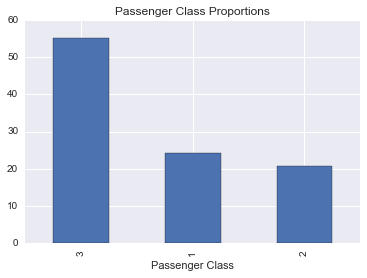

In [137]:
def vizualize_one_variable_desc_stat(df, variable, title='Proportions', xlabel='Variable'):
    '''
        Function to plot a bar graph to show the distribution of data in a variable/column.
    '''
    ((df[variable].value_counts(sort=True) / df[variable].count())*100).plot.bar(title= title)
    plt.xlabel(xlabel)

vizualize_one_variable_desc_stat(titanic_data, 'Pclass', title='Passenger Class Proportions', xlabel='Passenger Class')# Change the column name forpie charts for different variables.

>1. ~72% of the passengers in this dataset boarded from Southampton, ~19% from Cherbourg and ~8.5% from Queenstown
>2. ~55% of the Passengers were in 3rd Class, ~24% were in 2nd Class, ~20.5% in 2nd Class
>3. ~65% of the passengers were male, while ~35% were female.
>4. ~38% of the passengers survived and ~61.5% did not survive.

_Note: The above statistics are only for the partial dataset used for this project as availabe from the [Kaggle website](https://www.kaggle.com/c/titanic/data). For Embarked column we only consider the 889 records which have valid data for the calculation of the statistics._

---
So far we have used a single variable to find the statistics. Lets see what insights we can get by combining 2 variables. For this I will use the following helper function to plot the ratios for the 2 variables in a bar graph. The graphs are built using relative frequency as relative frequency graphs are a good way to visualize information. This is especially useful for information that is grouped into categories where you are looking for popularity or mode without being affected by the group wise distribution of the available data.(http://study.com/academy/lesson/frequency-relative-frequency-tables-definition-examples.html)

In [138]:
def two_variable_correlation(df, variable1, variable2, title='Bar Graph', color = 'rg'):
    """
        This function takes 2 variables to groupby and plot a graph,
        for the ratios of the 2 variables in the DaataFrame df.
    """
    group_stats = df.groupby([variable1, variable2])['PassengerId'].count().div(df.groupby([variable1])['PassengerId'].count())
    print group_stats.unstack()
    group_stats.unstack().plot.bar(stacked=True, title=title, color=color)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Code for shifting legend outside the plot was found from http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot#answer-4701285.
    # Thanks to Joe Kington and Andre Holzner for the answers.

---
Women and children were given preference for rescue on the Titanic, so lets see if it can be validate with our data. This plot is got by grouping the data with 'Sex' and 'Survived'. 


### Can we verify that women would have a higher survival rate?

Survived      Died  Survived
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


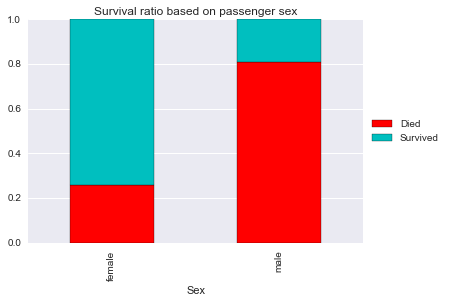

In [139]:
two_variable_correlation(titanic_data, 'Sex', 'Survived', 'Survival ratio based on passenger sex', color='rc')

We find that ~74% of the women survived while only ~19% men survived. This proves the above hypothesis.
We know that socio-economic factors can also incluence the survival outcome in such disasters. 

---
### Can we verify that 1st class passengers had a higher survival rate?

Survived      Died  Survived
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


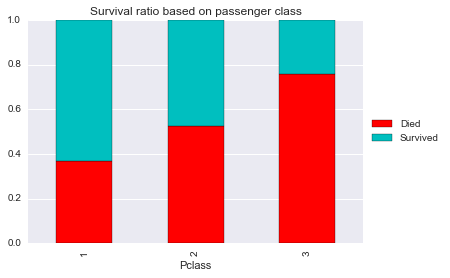

In [140]:
two_variable_correlation(titanic_data, 'Pclass', 'Survived', 'Survival ratio based on passenger class', color='rc')

We find that 1st Class and 2nd Class passengers were approximately 1.3-3 times more likely to survive from the Titanic disaster.

From multiple sources like [UltimateTitanic](http://www.ultimatetitanic.com/the-voyage/) we find that titanic disaster occured far away from the 3 Ports of Embarkation. So it is probably unlikely to influence the survival rate. Lets try to visualize to see if there is no correlation.

---

### Does Port of Embarkation affect the Survival rate?

Survived         Died  Survived
Embarked                       
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.663043  0.336957


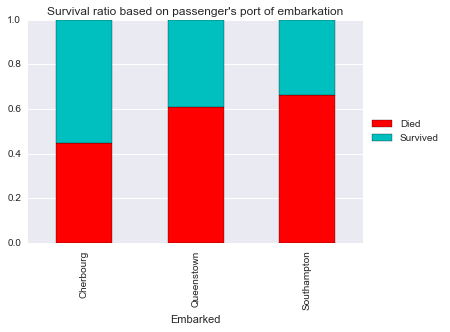

In [141]:
two_variable_correlation(titanic_data, 'Embarked', 'Survived', title="Survival ratio based on passenger's port of embarkation", color='rc')

We find something interesting here. People who embarked from Cherbourg had a higher survival rate. We need to dig deeper into this insight. There is a possibility that more female passengers boarded from Cherbourg, or there could be a significant variation in the passenger class ratio for Cherbourg. The age of the passengers boarding from Cherbourg could be lower, etc. 

---
### What is the sex ratio of passengers boarding from all ports? Is there any difference for Cherbourg to explain the above observation?

Sex            female      male
Embarked                       
Cherbourg    0.434524  0.565476
Queenstown   0.467532  0.532468
Southampton  0.315217  0.684783


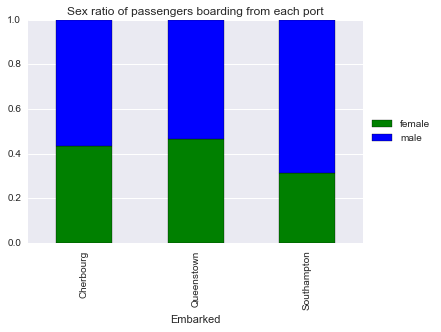

In [147]:
two_variable_correlation(titanic_data, 'Embarked', 'Sex', 'Sex ratio of passengers boarding from each port', color='gb')

We find that less than half the passengers from Cherbourg were female. So we can't explain the higher survival rate for Cherbourg passengers with the sex ratio of passengers from Cherbourg. Another surprising detail is,we find is that Southampton had ~68% male passengers. This also adds to why Southampton has low survival probabilty.

---
### Does passenger class ratio vary for the 3 ports?

Pclass              1         2         3
Embarked                                 
Cherbourg    0.505952  0.101190  0.392857
Queenstown   0.025974  0.038961  0.935065
Southampton  0.197205  0.254658  0.548137


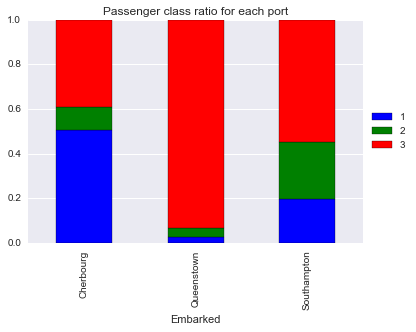

In [143]:
two_variable_correlation(titanic_data, 'Embarked', 'Pclass', 'Passenger class ratio for each port', color='bgr')

Cherbourg had a significantly higher ratio of passengers in 1st class. This could be one of the reasons for Cherbourg to have a higher survival rate. And we also get a contradiction with this information. Most of the passengers from Queenstown were for 3rd class and Southampton had a non skewed distribution. In that case, lets examine what influenced the survival rate of Queenstown passengers.

---

### Whats the influence of Age on survival rate?
###### We know that children were given preference for rescue operations. We also need to remember that Age was not explored before as it had a high rate of missing data. In the following analysis we only use the obeservations which have entry for 'Age', so that means we are using only ~80% of the sample set for the following vizualization.

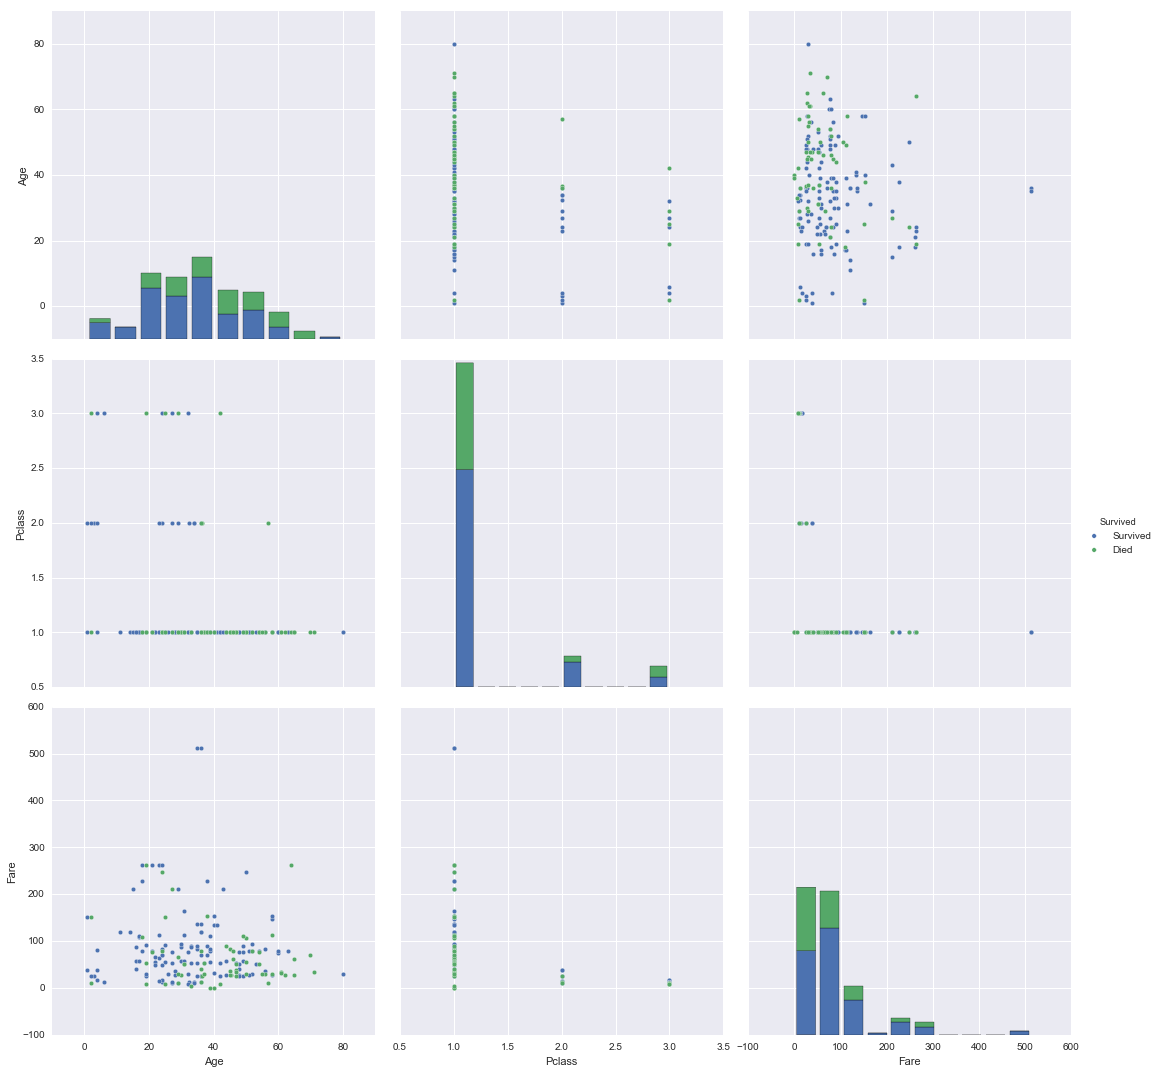

In [144]:
sns.pairplot(titanic_data.dropna(), hue="Survived", dropna=True, vars=['Age', 'Pclass', 'Fare'], size=5)

We can notice that passengers of age below 40 had a higher survival rate than the passengers above the age of 40. The plot shows how the survival rate keeps decreasing as age incrases. Also this plot shows us that most passengers in this sample dataset are in the first class, which might not be true for the complete population of passengers of Titanic, and so our analysis here can be skewed as our data is skewed to 1st class passengers.

Along with the sparse data for 2nd and 3rd class passengers, we also need to note that the 2nd and 3rd class passengers have outliers in age field. So that can affect our analysis when we are dealing with only passengers from 2nd or 3rd class.

The above vizualization gives some interesting plots for Fare. For the above vizualization we used only the entries which had age values. Lets see if we can find any trends with fare and survival rate for the complete data set.

---

### How does the fare paid affect the survival rate?

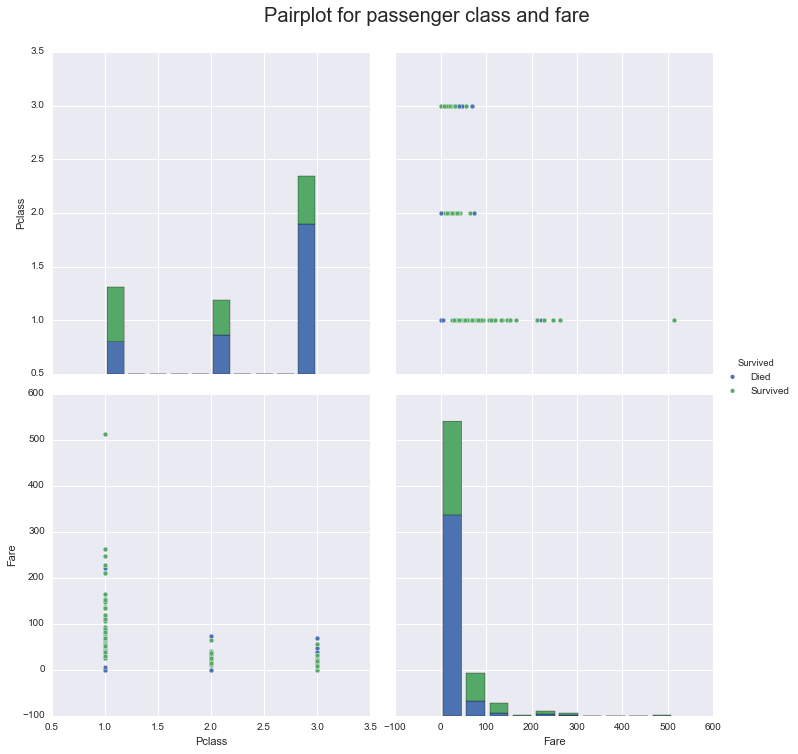

In [145]:
p = sns.pairplot(titanic_data, hue="Survived", dropna=True, vars=[ 'Pclass', 'Fare'], size=5)
p.fig.text(0.33, 1.02,'Pairplot for passenger class and fare', fontsize=20)
# ^ from http://stackoverflow.com/questions/32481214/how-to-annotate-seaborn-pairplots

The plot shows that as the fare paid increases, the survival rate also increases. Lets group the fare data with passenger class data to vizualize the distribution of passenger fares by passenger class.

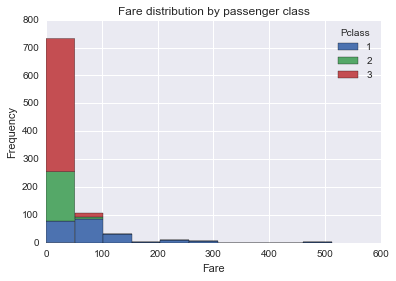

In [146]:
pivot = pd.pivot_table(titanic_data.reset_index(), index='PassengerId', columns='Pclass', values='Fare')
pivot.plot.hist(stacked=True, title='Fare distribution by passenger class')
plt.xlabel('Fare')

We find that most 3rd class passengers paid less than $50 for the trip. This indirectly shows how willing the passengers might have been to pay a premium for their survival. Thus the fare paid for the journey, in a way, explains the higher survival rate of 1st class passengers.

---

## Limitations of the Analysis
It is important to note that in the above analysis we are only trying to find patterns in the data. Since this is not an experiment, we can not contol for any extraneous factors/variables and so can not Statistically prove any of our findings above. We are using the data to observe if the expected factors, like socio-economic status, affected the survival outcome of the passengers.

The data provided to use is a partial dataset of all the passengers of the titanic. So, we need to be aware of this when making any conclusions from the partial data, as there might be some variations in the data we do not work with. For example, in out analysis we used data where the number of passengers from Queenstown was very low, compared to the other 2 ports. So we can not make any general statement on Queenstown passengers with this limited dataset.

The given data has many missing data, and in the above analysis we have choosen to ignore passengers with such missing data. Which means that we have not used the complete dataset and that could introduce some unintended bias into the analysis. There were many more columns/variables, like number of parents or siblings, cabin location, etc., which were not used in the analysis due to the limited scope of this project. 

To repeate the limitations again, we are only looking at the trends in the data and not making any causal statements about the data. We say that being a 1st class passenger might have increased the chances of the passengers survival, but that should be treated as a causal statement. We can not control the various lurking variables in our analysis. In fact its implossible, as we are dealing with historic data, and as with any data we can not capture the complete information about a person in a study. Just to touch upon an example, rich people tend to be more healty, would that have influenced the higher survival rate of the passengers?. That's a question we can not answer with this data.


---

## Conclusions
###### With the above stated limitations in mind, the follwing conclusions can be made about the data.

In the start of the analysis, some of the main questions was to see if the influence of age, socio-economic status, sex of the passenger have been in-line with the general expectation. Over the course of the analysis we find that age was detrimental for the survival probabilty. As the age of passengers increased, their probabilty of survival decreased. Similarly the socio-economic status of the passenger, from the fare paid and passenger class, explains the influence of increased survival probabilty of the rich passengers. And with any such disaster, the preference to rescue women and children can be seen in the data with almost three quarters of the women surviving, while less than one fifth of the men survived.

We also find some interesting facts about the economic status of passenger of the different cities by looking at the data of passenger class for each of the port cities. Cherbourg seems to be having more rich passengers than the other cities, which explains the higher survival probabilty for Cherbourg passengers. The distribution of fare shows the expected trend of heavy spending by the middle aged passengers.

###### A rich, middle aged male has a high probabilty of survival. So do women and children.


---

## Future Work
In this project, data analysis was conducted in the descriptive form. Few variables were not exaustively or partially explored. These fields can be analysed in detail to find more possible explainations for probabilty of survival. The fields like number of siblings and parents or spouses can be used to see if having many dependents or known co-passengers on the titanic could have influenced suvival. This could also be exptended to find families, by using the second name from the name field and mathcing with the number of siblings and parents. This can have many complications in interpretation but has the potential to find some interesting trends about the second names and the bias associated to family names and honorific associated to these famililes.

In future projects machine learning can be explored to build predictive models for the survival probabilty on titanic.

---